# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement



The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin on the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company improve its business.



### Data Description

The data includes various information related to a food order. A detailed data dictionary is provided below.

### Data Dictionary

order_id: Unique ID of the order

customer_id: ID of the customer who ordered the food

restaurant_name: Name of the restaurant

cuisine_type: Cuisine ordered by the customer

cost_of_the_order: Cost of the order

day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)

rating: Rating given by the customer out of 5

food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.

delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Write your code here to import necessary libraries for the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# List the directories in drive
!ls /content/drive/MyDrive/content/drive

In [3]:
# Write your code here to read the data

data=pd.read_csv('/content/drive/MyDrive/content/drive/foodhub_order.csv')

In [4]:
# Display the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# View the shape of the dataset.
data.shape

(1898, 9)

#### Observations:
* Food hub order data has in total 1898 orders and 9 columns(features)

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# View the datatypes and columns in the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* There are four columns such as restaurant_name, cuisine_type and day_of_the_week and rating are categorical values.

* And there are 5 columns such as order_id,customer_id, cost_of_the_order, food_preparation_time and delivery_time are numerical values.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Find the missing values
print("Info of missing values\n",data.isnull().sum())

Info of missing values
 order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:
* There are no missing values in the dataset since the sum of null values in each columns are zero

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Satistical summary
print("Statistical Summary")
data.describe(include='all')

Statistical Summary


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898,1898,1898.000000,1898,1898,1898.000000,1898.000000
unique,NaN,NaN,178,14,NaN,2,4,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736,NaN,NaN
mean,1.477496e+06,171168.478398,NaN,NaN,16.498851,NaN,NaN,27.371970,24.161749
std,5.480497e+02,113698.139743,NaN,NaN,7.483812,NaN,NaN,4.632481,4.972637
min,1.476547e+06,1311.000000,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000
25%,1.477021e+06,77787.750000,NaN,NaN,12.080000,NaN,NaN,23.000000,20.000000
50%,1.477496e+06,128600.000000,NaN,NaN,14.140000,NaN,NaN,27.000000,25.000000
75%,1.477970e+06,270525.000000,NaN,NaN,22.297500,NaN,NaN,31.000000,28.000000


#### Observations:
* The minimum, average, and maximum time it takes for food to be prepared once an order is placed is 20 minutes, 27.37 minutes , 35 minutes respectively.
* The minimum, average, and maximum time it takes for delivery time is 15 minutes, 24.16 minutes , 33 minutes respectively.
* 75\% of food items were delivered within 28 minutes.
* 50\% of food items has been prepared within 27 minutes.
* The most popular restaurant is Shake Shack.
* The most pouplar cuisine type is American.
* The highest cost of the order is \$35.41 and the average cost of the order is \$16.49
* The lowest cost of order is \$4.47


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Number of orders not rated
not_rated=data[data['rating']=='Not given'].shape[0]
print("Number of orders not rated are", not_rated)
# Percentage of orders not rated
print("Percentage of orders not rated",round(not_rated/data.shape[0],2)*100,"%")


Number of orders not rated are 736
Percentage of orders not rated 39.0 %


#### Observations:
* There are 736 orders not rated whose values have been given as 'Not given'.
* 39\% of orders were not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
# Number of Customers who have placed orders
print("Number of Customers who have placed orders are",data['customer_id'].unique().shape[0])

Number of Customers who have placed orders are 1200


### Observation
* There are 1200 unique customers placed orders according to the dataset given.

In [ ]:
# Number of placed orders ; checking for duplicates
print("Total number of orders :",data['order_id'].unique().shape[0])

Total number of orders 1898


### Observations
* There are no duplicates in the order_id column as the total number of rows in the dataset is same as number of unique order_ids.

In [ ]:
# Top 5 Customers.
print("Top Five Customers")
data.groupby('customer_id')['order_id'].count().sort_values(ascending=False).head(5)

Top Five Customers


,order_id
customer_id,
52832,13
47440,10
83287,9
250494,8
276192,7


### Observations
* Customer id 52832 has placed most number of orders


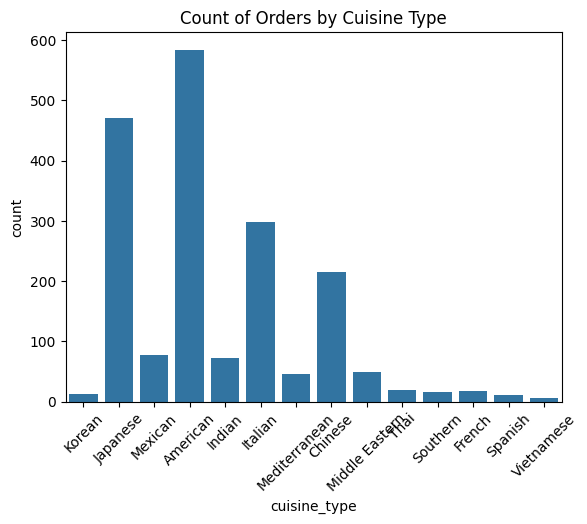

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64


In [ ]:
# Count of cuisine types

# plot the frequency of orders based on cuisine type
sns.countplot(data=data, x='cuisine_type')
# rotate xlabel to 45 degree
plt.xticks(rotation=45)
# Set the title of the graph
plt.title('Count of Orders by Cuisine Type')
# Plot the graph
plt.show()
print(data['cuisine_type'].value_counts())

### Observation
* The customers mostly ordered American Cuisine types.
* The second preference goes to Japanese.
* The least preference goes to Vietnamese

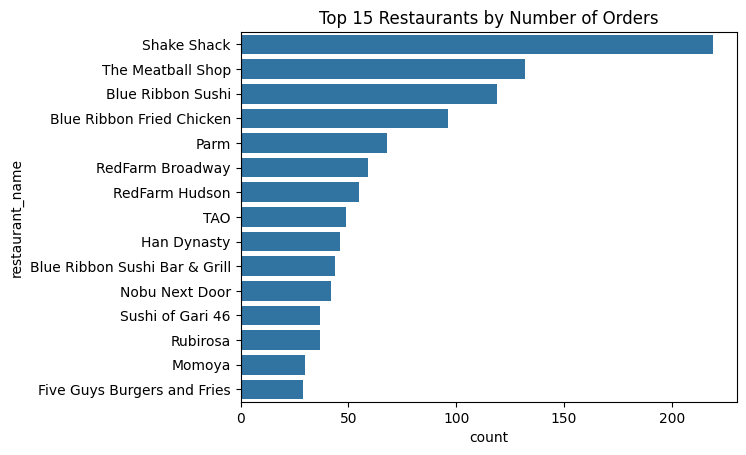

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
...,...
Rye House,1
Hiroko's Place,1
Frank Restaurant,1


In [ ]:
# Top 15 Restuarants

# Plot the frequency of orders based  on categorical variable  restaurant_name
sns.countplot(data=data, y='restaurant_name', order=data['restaurant_name'].value_counts().index[:15])
# Set the title
plt.title('Top 15 Restaurants by Number of Orders')
# Plot the graph
plt.show()
# Display unique restaurants
data['restaurant_name'].value_counts()

### Observation
* Shake Shack has the highest orders according to the dataset.
* There are 219 orders has been placed by the customers.


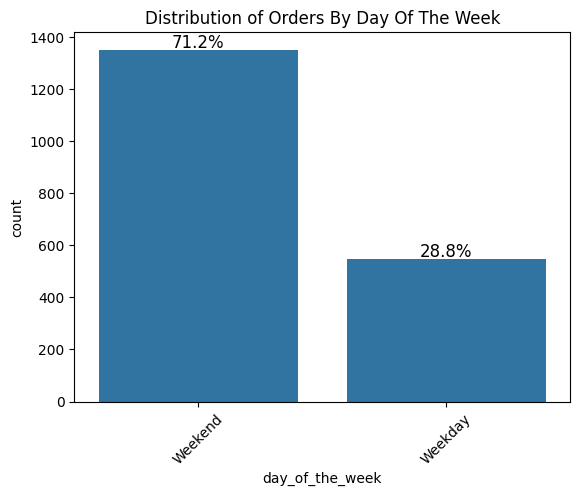

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64
Percentage of order in weekends 71.18 %


In [8]:
# Distribution of orders in day_of_the_week
#perc: whether to display percentages instead of count (default is False)
perc=True
total = len(data['day_of_the_week'])  # length of the column
count = data['day_of_the_week'].nunique()

# Plot the frequency of orders  based on categorical vatiable day_of_the_week
ax=sns.countplot(data=data, x='day_of_the_week')
# Rotate the x label by 45 degree
plt.xticks(rotation=45)
# Set the title
plt.title('Distribution of Orders By Day Of The Week')
# Display % on each bar
for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage


# Plot the graph
plt.show()
# View the orders based on weekend and weekday
print(data['day_of_the_week'].value_counts())
# Find the percentage of orders in weekend
percent_order_weekend=round(data[(data['day_of_the_week']=='Weekend')]['order_id'].count()/data.shape[0]*100,2)
print("Percentage of order in weekends",percent_order_weekend,'%')

### Observation

* Weekends have highest number of orders than Weekdays
* There are 71\%  of orders in weekends

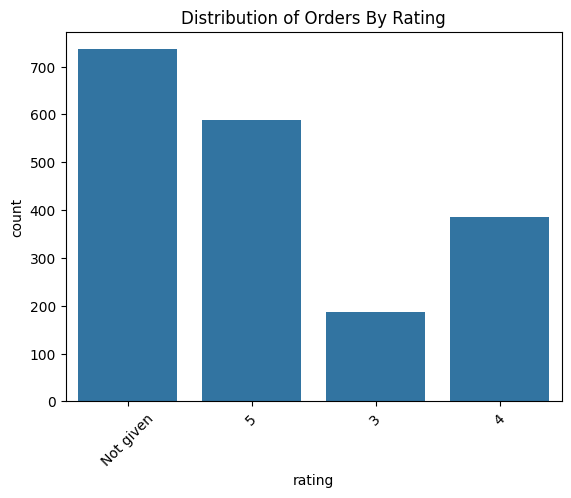

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


In [ ]:
# Distribution of orders by ratings

#Plot the frequency of rating
sns.countplot(data=data, x='rating')
# Rotate the x axis lable by 45 degree
plt.xticks(rotation=45)
# Set the title
plt.title('Distribution of Orders By Rating')
# Plot the graph
plt.show()
# View the unique orders based on rating
print(data['rating'].value_counts())

### Observations

* Most number of orders placed on the food items which are not rated yet.
* Evidently, the remaining orders were placed in accordance with the ratings.

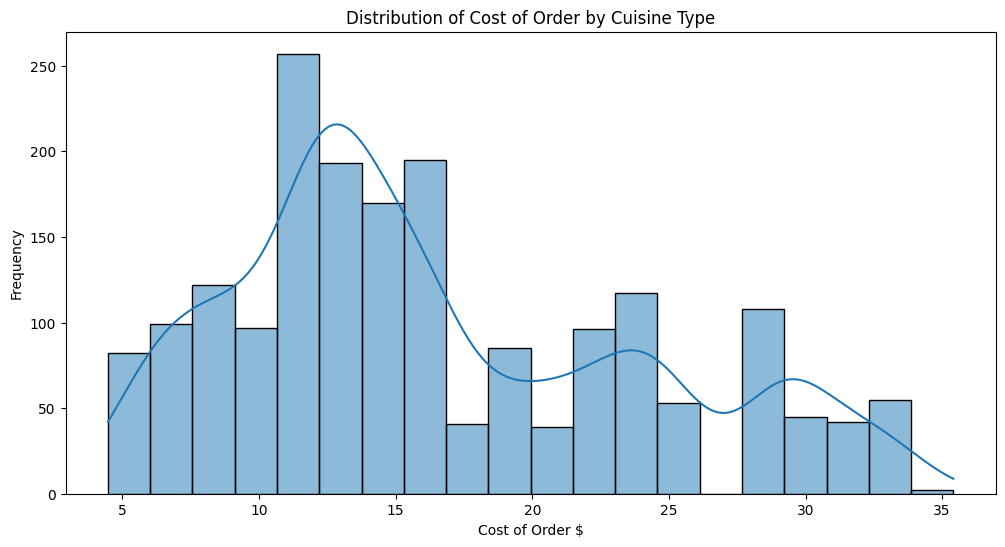

cost_of_the_order
12.18    86
12.13    82
12.23    47
24.20    42
29.10    37
         ..
7.66      1
10.86     1
7.95      1
20.86     1
29.59     1
Name: count, Length: 312, dtype: int64


In [ ]:
# Distribution of Cost of Order by Cuisine Type
# Set the plot size
plt.figure(figsize=(12, 6))
# plot the frequency of orders based on cost_of_the_order
sns.histplot(data=data, x='cost_of_the_order', kde=True, bins=20)
# Set the title
plt.title('Distribution of Cost of Order by Cuisine Type')
# Set the x label
plt.xlabel('Cost of Order $')
# Set the y label
plt.ylabel('Frequency')
# Plot the graph
plt.show()
# View the unique values in cost_of_the_order
print(data['cost_of_the_order'].value_counts())

### Observations

* The graph illustrates the cost of orders are  right skewed.
* The cost of orders of majority orders lie between \$10 and \$15
* Second Peak is  between \$22 and \$23

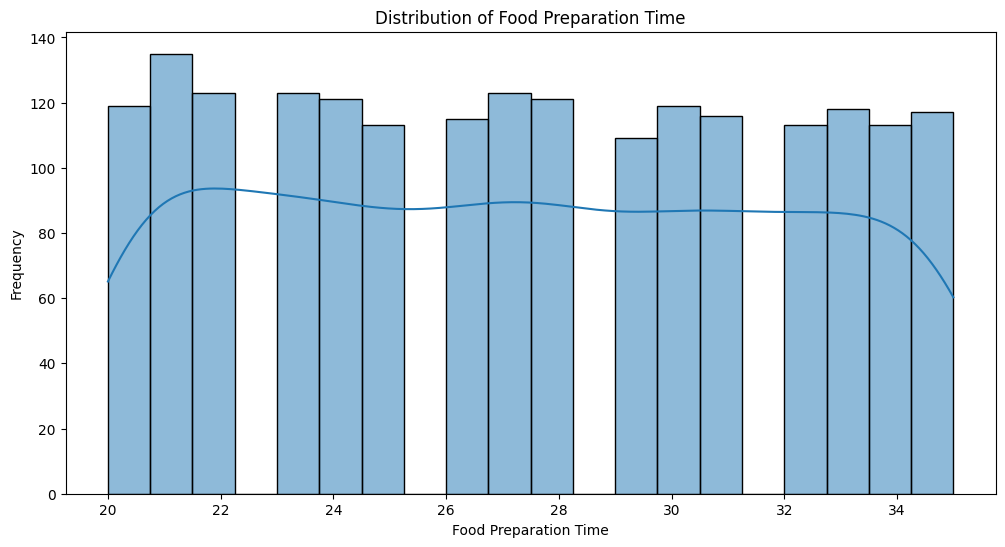

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64


In [ ]:
# Distribution of Food Preparation Time
# set the figure size
plt.figure(figsize=(12, 6))
# Plot the frequency of orders based on Food Preparation Time.
sns.histplot(data=data, x='food_preparation_time', kde=True, bins=20)
# Set the title
plt.title('Distribution of Food Preparation Time')
# Set the xlabel
plt.xlabel('Food Preparation Time')
# Set the ylabel
plt.ylabel('Frequency')
# plot the graph
plt.show()
# View Statistical summary of food_preparation_time
print(data['food_preparation_time'].describe())

### Observation
* The values in Food Preparation Time are  likely normaly distributed.
* The average food preparation time is 27.27minutes.

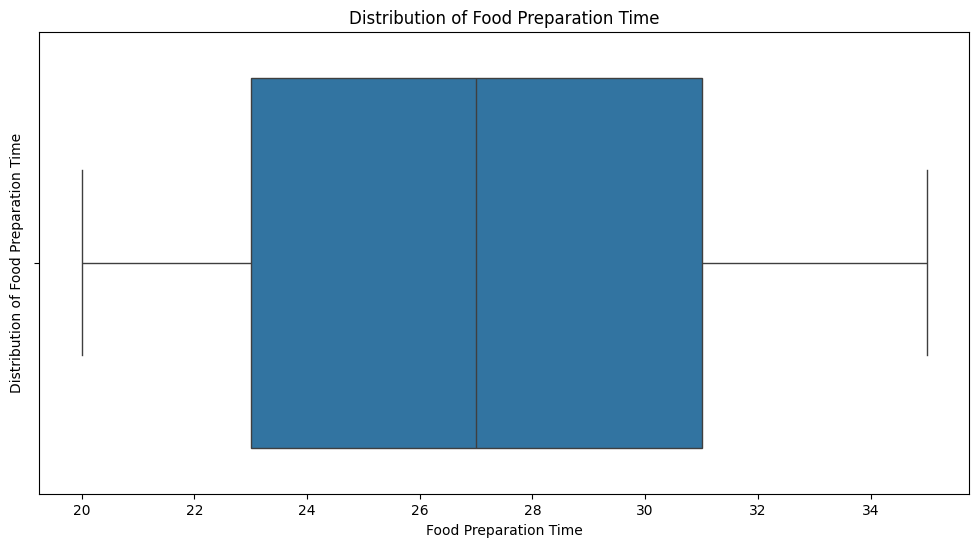

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

Median is 27.0 minutes


In [ ]:
# Distribution of Food Preparation Time
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='food_preparation_time')
# Set the title
plt.title('Distribution of Food Preparation Time')
# Set the x label
plt.xlabel('Food Preparation Time')
# Set the y label
plt.ylabel("Distribution of Food Preparation Time")
# Plot the graph
plt.show()
print("\nMedian is",data['food_preparation_time'].median(),"minutes")


### Observations
* There are no outliers
* The median of Food Preparation Time is 27.0
* 75\% of the orders has been prepared within 31 minutes.
* The highest Food preparation time is 35 minutes.
* The lowest Food preparation time is 20 minutes.

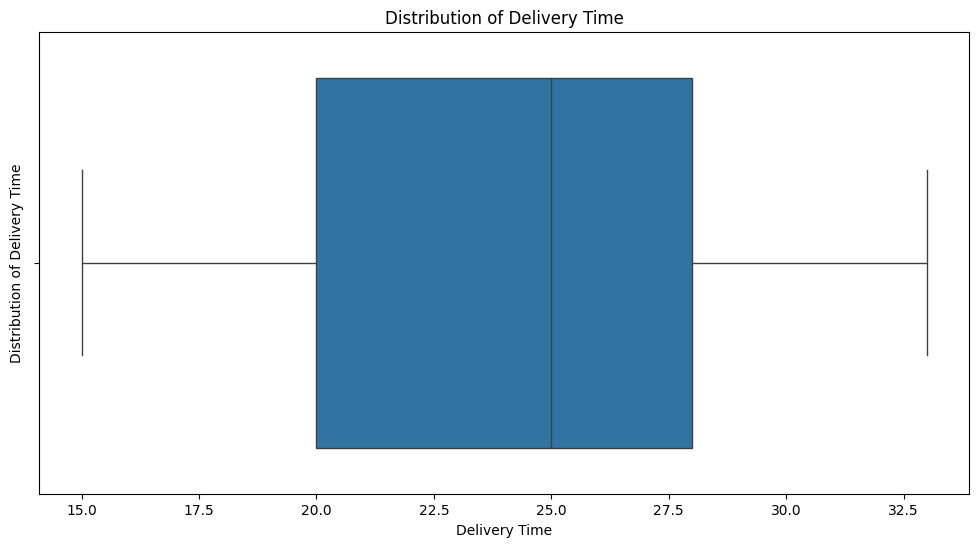

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

Median is 25.0 minutes


In [ ]:
# Distribution of Delivery Time
plt.figure(figsize=(12, 6))
# Plot the distribution of delivery time
sns.boxplot(data=data, x='delivery_time')
# set the title of the graph
plt.title('Distribution of Delivery Time')
# Set the x axis label
plt.xlabel('Delivery Time')
# Set the y axis label
plt.ylabel("Distribution of Delivery Time")
# plot the gragh
plt.show()
# Statistical summary of delivery time
print(data['delivery_time'].describe())
# View the delivery time median
print("\nMedian is",data['delivery_time'].median(),"minutes")


### Observations
* There are no outliers
* The median of Delivery Time is 25.0
* 75\% of the orders has been delivered within 28 minutes.
* The highest Delivery  time is 33 minutes.
* The lowest Delivery time is 15 minutes.

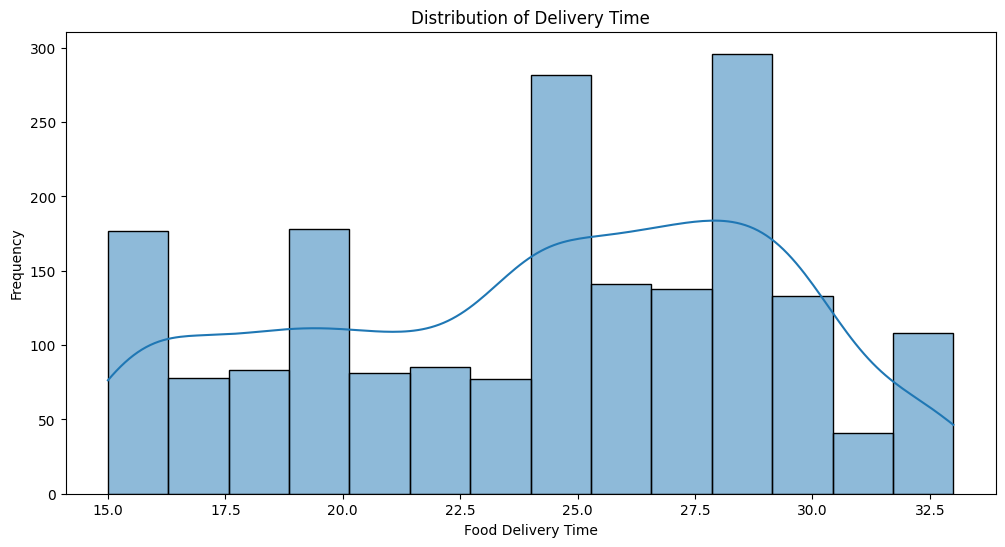

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64


In [ ]:
# Distribution of Delivery Time
# set the figure size
plt.figure(figsize=(12, 6))
# Plot the frquency of delivery time
sns.histplot(data=data, x='delivery_time',kde=True)
# Set the title
plt.title('Distribution of Delivery Time')
# Set the x label
plt.xlabel('Food Delivery Time')
# Set the y label
plt.ylabel('Frequency')
# plot the graph
plt.show()
# View the statistical summary of delivery time
print(data['delivery_time'].describe())

### Observations


* Peak delivery times are around 28–30 minutes.
* Fewer deliveries occur at shorter times (e.g., 17–20 minutes).


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

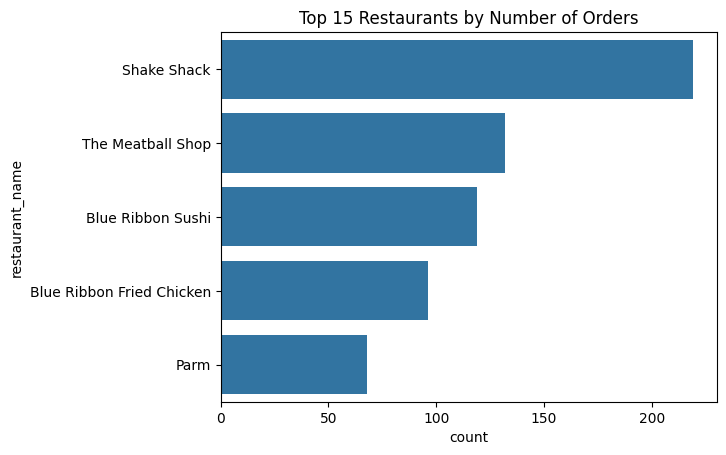

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
...,...
Rye House,1
Hiroko's Place,1
Frank Restaurant,1


In [ ]:
#  Top 5 Restuarants
# Plot the frequency of orders based on restaurant_name
sns.countplot(data=data, y='restaurant_name', order=data['restaurant_name'].value_counts().index[:5])
# Set the title
plt.title('Top 15 Restaurants by Number of Orders')
# Plot the graph
plt.show()
# Plot the count of  unique restaurants
data['restaurant_name'].value_counts()

#### Observations:
* The largest number of orders was placed at Shake Shack, with 219.
* The restaurant Parm got 68 orders


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# The Most Popular Cuisine on weekends
print("The most popular cuisine on weekends is",data[data['day_of_the_week']=='Weekend']['cuisine_type'].mode()[0])

The most popular cuisine on weekends is American


#### Observations:
* The most popular cuisine on weekends is American.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Percentage of orders cost more than 20 dollars

print("The percentage of orders that cost more than $20 is",round((data[data['cost_of_the_order']>20].value_counts().shape[0]/data.shape[0])*100,2),"%")

The percentage of orders that cost more than $20 is 29.24 %


#### Observations:

* 29% of orders cost more than \$20
* Majority of orders are below \$20


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Mean Delivery Time
print("The mean delivery time is ",round(data['delivery_time'].mean(),2),"minutes")

The mean delivery time is  24.16 minutes


#### Observations:

* The average delivery time for the orders is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Top 5 Customers based on number of orders placed.
print("Top 5 Customers")
data.groupby('customer_id')['order_id'].count().sort_values(ascending=False).head(3)

Top 5 Customers


,order_id
customer_id,
52832,13
47440,10
83287,9


#### Observations:

* The Topest customer has placed 13 orders
* The second and third topest customers have placed 10 and 9 orders respectively


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
# Popular restarants filtered with rating=5
popular_dish_restaurant=data[data['rating']=='5'][['cuisine_type','restaurant_name']].drop_duplicates()
# Most popular restarants for most popular dish American
print("Most popular restarants for most popular dish American")
popular_dish_restaurant[(popular_dish_restaurant['cuisine_type']=='American')]['restaurant_name']

Most popular restarants for most popular dish American


,restaurant_name
12,Blue Ribbon Fried Chicken
15,Shake Shack
44,Five Guys Burgers and Fries
46,DuMont Burger
243,Delicatessen
259,Waverly Diner
302,The Smile
311,Lucky's Famous Burgers
332,P.J. Clarke's
356,Bubby's


#### Observations
* There are 28 popular restaurants for Poular American cuisine.

In [ ]:

# Customer order behaviour
# Find the total number of orders in Weekdays
print("Number of Customers who placed orders on Weekdays is",data[data['day_of_the_week']=='Weekday']['order_id'].value_counts().sum())
# Find the total number of orders in Weekends
print("Number of Customers who placed orders on Weekends is",data[data['day_of_the_week']=='Weekend']['order_id'].value_counts().sum())
# Find the percentage of  orders in weekends
print("% of Customer orders during weekends is",round(((data[data['day_of_the_week']=='Weekend']['order_id'].value_counts().sum()/data.shape[0])*100),2),"%")

Number of Customers who placed orders on Weekdays is 547
Number of Customers who placed orders on Weekends is 1351
% of Customer orders during weekends is 71.18 %


### Observations

* 1351 customers placed orders on weekends.
* 71\% of customers placed orders on weekends.

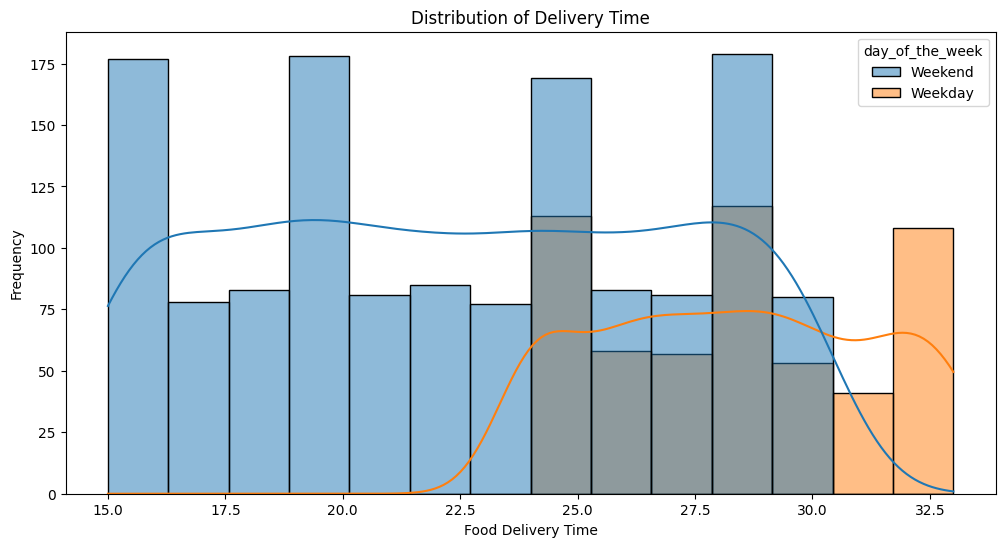

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64


In [ ]:
# Distribution of Delivery Time on day of the week.
# Set the figure size
plt.figure(figsize=(12, 6))
# Plot the frequency of orders based on delivery_time
sns.histplot(data=data, x='delivery_time',kde=True, hue='day_of_the_week')
# Set the title
plt.title('Distribution of Delivery Time')
# Set the x axis label
plt.xlabel('Food Delivery Time')
# Set the y axis label
plt.ylabel('Frequency')
# Plot the grapg
plt.show()
# View the statistical summary of delivery_time
print(data['delivery_time'].describe())

### Observations

#### Weekends:
* Higher frequency of deliveries around 17–20 minutes.
* A secondary peak around 28–30 minutes.

#### Weekdays:
* Peak delivery times are around 28–30 minutes.
* Fewer deliveries occur at shorter times (e.g., 17–20 minutes).
* Delivery time is longer on week days than weekends

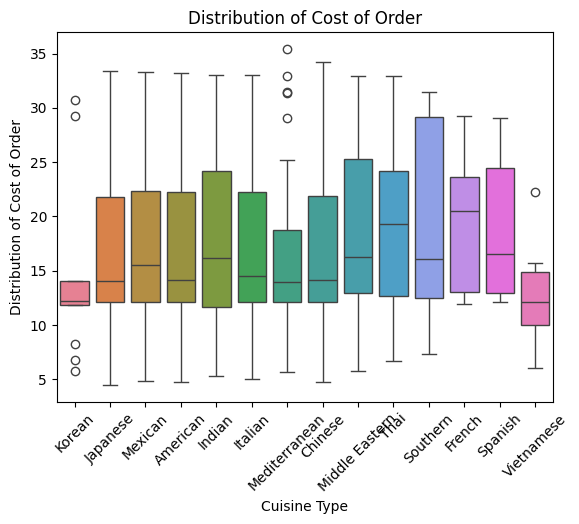

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64


In [ ]:

# Distribution of Cost of the order vs cuisine type
# Plot the distribution of cost of order based on cuisine type
sns.boxplot(data=data, x='cuisine_type',y='cost_of_the_order',hue='cuisine_type')
# rotate the x axis label by 45 degree
plt.xticks(rotation=45)
# Set the title
plt.title('Distribution of Cost of Order')
# Set the x axis label
plt.xlabel('Cuisine Type')
# Set the y axis label
plt.ylabel("Distribution of Cost of Order")
# Plot the graph
plt.show()

# View the statistical summary of cost of order
print(data['cost_of_the_order'].describe())

### Observations
* There are a few outliers in the values of Cuisine Types Korean, Mediterranean and Vietnamese, which has to be verified with the restaurants.
* The cheapest cuisine type is Vietnamese


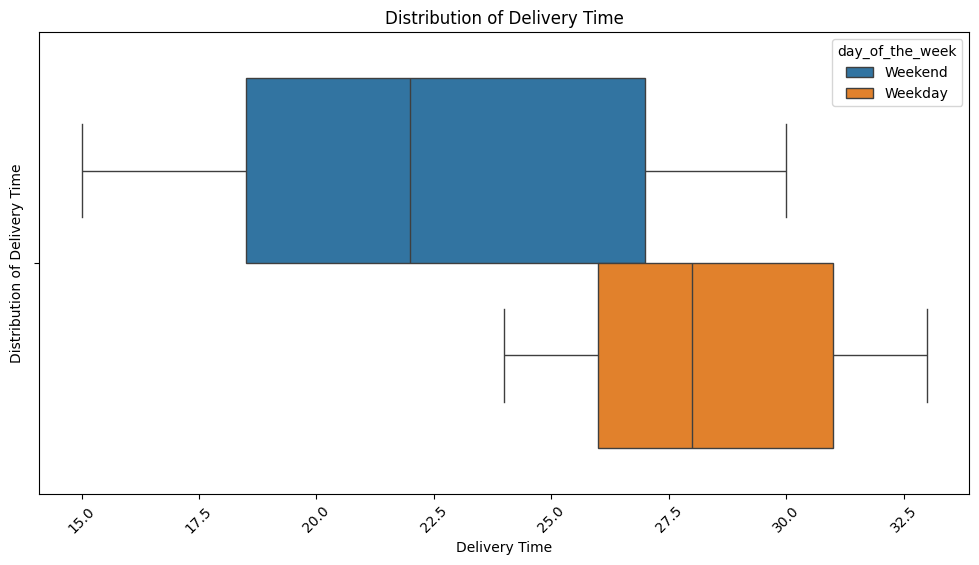

In [ ]:

# Distribution of Delivery  Time
plt.figure(figsize=(12, 6))
# Plot the distribution of Delivery  Time based on day_of_the_week
sns.boxplot(data=data, x='delivery_time',hue='day_of_the_week')
# Rotate the x label to 45 degree
plt.xticks(rotation=45)
# Set the title
plt.title('Distribution of Delivery Time')
# Set the Delivery Time
plt.xlabel('Delivery Time')
# Set the y label
plt.ylabel("Distribution of Delivery Time")
# Plot the graph
plt.show()



### Observations
* The delivery time during weekdays are longer than weekends

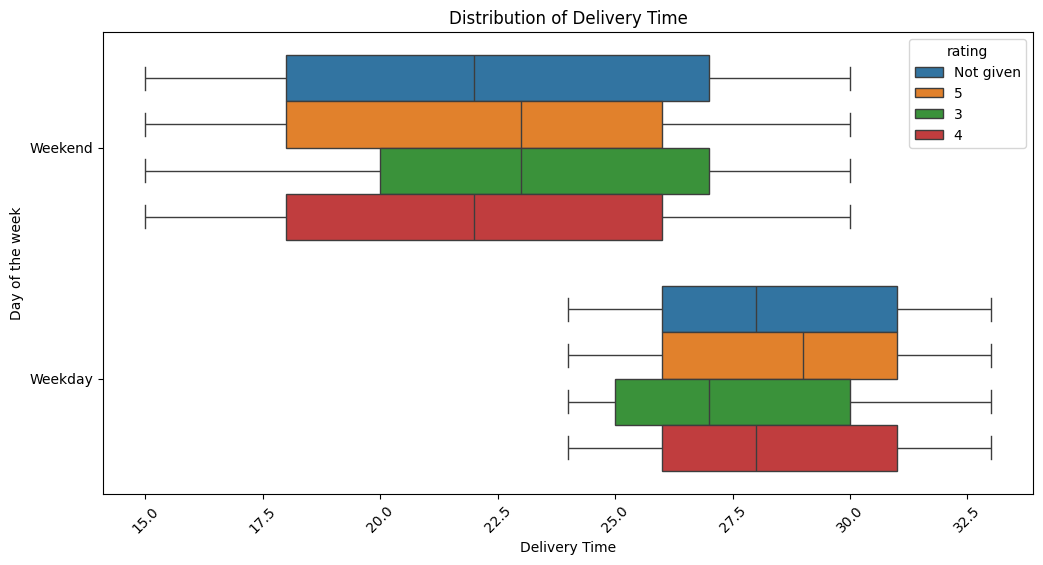

In [ ]:

# Distribution of Delivery  Time vs day of the week and rating

# Set the figure size
plt.figure(figsize=(12, 6))
# Plot the distribution of delivery time vs day_of_the_week and rating
sns.boxplot(data=data, x='delivery_time',y='day_of_the_week',hue='rating')
# Rotate the x axis label to 45 degree
plt.xticks(rotation=45)
# Set the title
plt.title('Distribution of Delivery Time')
# Set the x label
plt.xlabel('Delivery Time')
# Set the y label
plt.ylabel("Day of the week")
# Plot the graphS
plt.show()



### Observations
* There are no outliers
* The orders which are not rated seems wide spread  especially during weekends

In [ ]:
# Find the total time between the order placement time and delivery time
data['total_time']=data['food_preparation_time']+data['delivery_time']

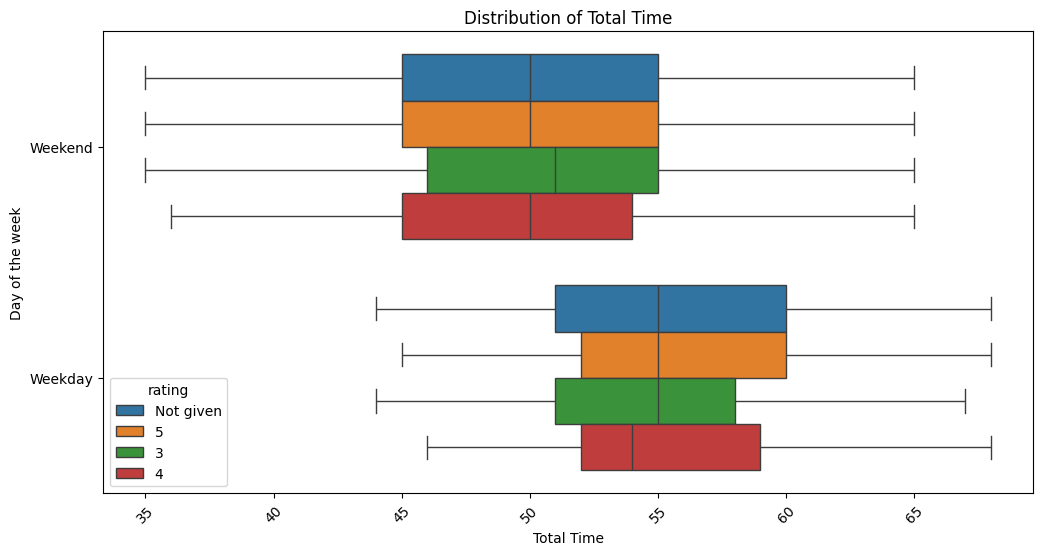

In [ ]:
# Distribution of Total Time vs day of the week and rating

# Set the figure size
plt.figure(figsize=(12, 6))
# Plot the distribution of total_time vs day_of_the_week and rating
sns.boxplot(data=data, x='total_time',y='day_of_the_week',hue='rating')
# Rotate the x axis label by 45 degree
plt.xticks(rotation=45)
# Set the title
plt.title('Distribution of Total Time')
# Set the axis label
plt.xlabel('Total Time')
# Set the y axis label
plt.ylabel("Day of the week")
# Plot the graph
plt.show()



### Observation
* The shorter the total time the higher the rating

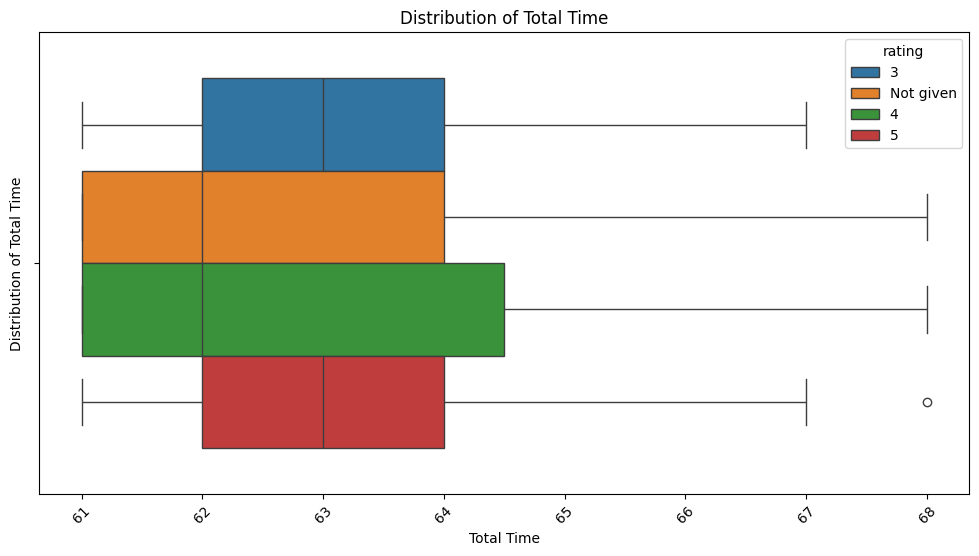

In [ ]:
# Distribution of Delivery  Time vs rating for orders total time >60 minutes

# filter the rows where total_time is greater than 60 minutes
total_time_df=data[data['total_time']>60]
# Set the figure size
plt.figure(figsize=(12, 6))
# Plot the distribution of total time based on rating
sns.boxplot(data=total_time_df, x='total_time', hue='rating')
# Rotate the x axis label to 45 degree
plt.xticks(rotation=45)
# Set the title
plt.title('Distribution of Total Time')
# Set the x label
plt.xlabel('Total Time')
# set the y label
plt.ylabel("Distribution of Total Time")
# Plot the graph
plt.show()



### Observations
* No Strong correlation between Total Time and rating.
* There is high variability in the ratings Not given, which is to be investigated.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Convert categorical type rating to integer to do the analysis

# Copy the dataset to another variable
df=data.copy()
# Convert the categorical variable rating to numerical
df['rating']=pd.to_numeric(data['rating'], errors='coerce')
df['rating']

,rating
0,NaN
1,NaN
2,5.0
3,3.0
4,4.0
...,...
1893,5.0
1894,5.0
1895,NaN
1896,5.0


In [ ]:
# Find the total number of ratings and average ratings, and select the restaurants that meet the promotional criteria condition
df_sorted=df.groupby('restaurant_name')['rating'].agg(['count','mean']).sort_values(by='count',ascending=False)
# Find the restaurants eligible for promotional offer
print("The restaurants eligible for promotional offers are :")
df_sorted[(df_sorted['count'] > 50) & (df_sorted['mean'] > 4)]

The restaurants eligible for promotional offers are :


,count,mean
restaurant_name,,
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905
Blue Ribbon Sushi,73,4.219178
Blue Ribbon Fried Chicken,64,4.328125


#### Observations:
* There are four restaurants eligible for promotional offer.
* Shake Shak is the most popular restaurant.



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Function to find the commission
def rev(order_value):
  if order_value >20:
    return order_value*.25
  elif order_value>5:
     return order_value*.15





In [ ]:
# Find the commission on each cost_of_the_order value
revenue_df=data['cost_of_the_order'].apply(rev)
# Find the total revenue
total_revenue = round(revenue_df.sum(),2)
print("Total Revenue:$", total_revenue)
# Number of orders that meets the company constraint
num_order=revenue_df.count()
print("The number of orders in which revenue generated is",num_order)
# Find the percentage
print("Percentage of orders in which revenue generated",round((num_order/data.shape[0])*100,2),'%')


Total Revenue:$ 6166.3
The number of orders in which revenue generated is 1889
Percentage of orders in which revenue generated 99.53 %


#### Observations:

* The total revenue for the company is \$ 6166.3.
* There are 99.53 % of orders in which revenue was generated.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Find Orders took more than 60 minutes
data['total_time']=df['food_preparation_time']+df['delivery_time']
# Find the number of orders where total time is greater than 60 minutes
data_g60=data[(data['total_time']>60)]['total_time'].count()
# Find the percentage of orders greater than 60 minutes
percent=(data_g60/data.shape[0])*100
print("", percent.astype(int),"% of orders took more than 60 minutes")


 10 % of orders took more than 60 minutes


#### Observations:
* There are 200 orders which took more than 60 minutes to deliver.
* 10 \% of orders has taken more than 60 minutes to deliver.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Mean Delivery Time on week_days and Week_ends

# Find Mean Delivery Time on Weekdays
mean_week_days=data[data['day_of_the_week']=='Weekday']['delivery_time'].mean()
print("Average delivery time on Weekdays",mean_week_days.astype(int))
# Find Mean Delivery Time on Weekends
mean_week_ends=data[data['day_of_the_week']=='Weekend']['delivery_time'].mean()
print("Average delivery time on Week ends",mean_week_ends.astype(int))


Average delivery time on Weekdays 28
Average delivery time on Week ends 22


#### Observations:
* On Week days the average delivery time is 28 minutes.
* On Week ends it is 22 minutes.
* Average delivery time on Weekdays is longer than Weekends


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusion:
*  The most popular restaurant is Shake Shack and  there are 219 orders has been placed by the customers in this restaurant.
* The most popular cuisine on weekends and weekdays is American.
* The customers mostly order American Cuisine types, the second preference goes to Japanese and the least preference goes to Vietnamese.

* The cheapest cuisine type is Vietnamese.
* The highest cost of the order is \$35.41 and  the   average cost of the order is $16.49
* The lowest cost of order is \$4.47
* The cost of orders of majority orders lie between \$10 and \$15.
* 29% of orders cost more than \$20.
* Majority of orders are below \$20.
* 39\% of orders were not rated.
* Weekends have highest number of orders than Weekdays.
* The largest number of orders was placed at Shake Shack, with 219.
* The restaurant Parm got 68 orders.
* There are 1200 unique customers placed orders according to the dataset given.
* More preparation time needed in weekends than weekdays due to higher number of orders.
* The median of Food Preparation Time is 27.0
* 75\% of the orders has been prepared within 31 minutes.
* The highest Food preparation time is 35 minutes.
* The lowest Food preparation time is 20 minutes.
* The median of Delivery Time is 25.0
* The average delivery time for the orders is 24.16.
* 75\% of the orders has been delivered within 28 minutes.
* The highest Delivery time time is 33 minutes.
* The lowest Delivery time is 15 minutes.
* The delivery time during weekdays are longer than weekends.
* Peak delivery times are around 28–30 minutes.
* Fewer deliveries occur at shorter times (e.g., 17–20 minutes).
* 10 \% of orders has taken more than 60 minutes to deliver.
* On Week days the average delivery time is 28 minutes.
* On Week ends it is 22 minutes.
* Average delivery time on Weekdays is longer than Weekends
* The Topest customer has placed 13 orders.
* The second and third topest customers have placed 10 and 9 orders respectively
* There are 28 popular restaurants for Poular American cuisine.
* There are four restaurants eligible for promotional offer.
* The total revenue for the company is \$ 6166.3.
* There are 99.53 % of orders in which revenue was generated.



### Recommendations:

*  Weekends have highest number of orders hence it is good to hire more staffs to meet this requirement.
* Weekdays take longer delivery time, it may be because of traffic or other operational challenges, try to shorten the delivery times by arranging better traffic navigation.
* The shorter the total time (food preparation time+delivery time) the higher the rating.
* There is high variability in the ratings Not given, which is to be investigated.
* Encourage customers to mark their ratings by sending SMS, email or push messages after delivery,majority of orders in the dataset given are not rated.
* Give promotional offers to a frequent customers, which could encourage the customers to place more orders.
* Give promotional combo offers during weekends, to increase the sales further.
* Set a boundary for orders for restaurants and if the number of orders exceed this value assign commission to those restaurants.
